In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_attend_refuses = pd.read_csv(
    r"..\data\посещаемость\График_для_www.pan-stp.com-Посещаемость_отказы_за_5_лет.csv", 
    parse_dates = ['Период'],
    index_col='Период'
)
df_attend_refuses

,Отказы,empty
Период,,
2018-11-04,0.205882,NaN
2018-11-05,0.172414,NaN
2018-11-06,0.201835,NaN
2018-11-07,0.157303,NaN
2018-11-08,0.239669,NaN
...,...,...
2023-10-30,0.243056,NaN
2023-10-31,0.184397,NaN
2023-11-01,0.273885,NaN


In [3]:
df_attend_refuses.drop(["empty"], axis=1, inplace=True)

In [4]:
df_attend_views = pd.read_csv(
    r"..\data\посещаемость\График_для_www.pan-stp.com-Посещаемост(просмотры за 5 лет).csv", 
    parse_dates = ['Период'],
    index_col='Период'
)
df_attend_views

,Просмотры,na
Период,,
2018-11-03,318,NaN
2018-11-04,297,NaN
2018-11-05,378,NaN
2018-11-06,330,NaN
2018-11-07,256,NaN
...,...,...
2023-10-29,287,NaN
2023-10-30,340,NaN
2023-10-31,353,NaN


In [5]:
df_attend_views.drop(["na"], axis=1, inplace=True)

In [6]:
df_attend_views.describe()

,Просмотры
count,1826.000000
mean,311.243154
std,162.798677
min,0.000000
25%,193.000000
50%,298.000000
75%,410.000000
max,1137.000000


In [7]:
df = df_attend_refuses.merge(df_attend_views, left_index=True, right_index=True)
df

,Отказы,Просмотры
Период,,
2018-11-04,0.205882,297
2018-11-05,0.172414,378
2018-11-06,0.201835,330
2018-11-07,0.157303,256
2018-11-08,0.239669,375
...,...,...
2023-10-29,0.229358,287
2023-10-30,0.243056,340
2023-10-31,0.184397,353


In [8]:
df_mean = df.groupby(by='Просмотры').mean()
df_mean

,Отказы
Просмотры,
0,0.000000
1,0.000000
2,0.000000
4,0.250000
21,0.357143
...,...
938,0.258993
944,0.292683
985,0.442596


In [9]:
df_mean['Просмотры']=df_mean.index

<Axes: xlabel='Просмотры', ylabel='Отказы'>

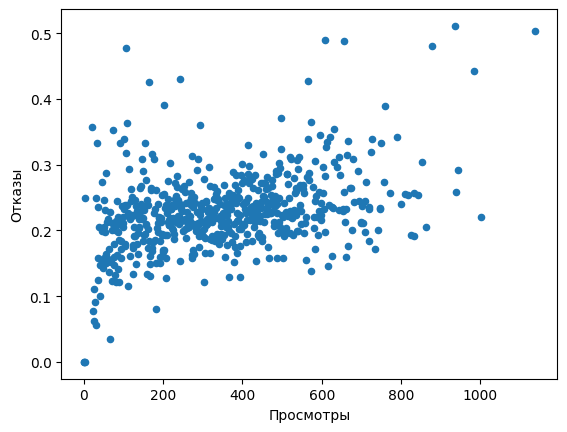

In [10]:
df_mean.plot.scatter(x="Просмотры", y="Отказы")

In [11]:
!pip install statsmodels


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import statsmodels.api as sm

#### Подготовка данных для линейной модели

In [13]:
Y = df_mean['Отказы'] #выделяем столбец, по оси Y

In [14]:
X = df_mean['Просмотры']#выделяем столбец, по оси X

In [15]:
X = sm.add_constant(X) #добавляем константу к моделе (указываем,что линия должна быть константа перечечение с осью)

In [16]:
model = sm.OLS(Y,X)  #OLS- Ordinary least Squares-Обычная Линейная Регрессия (x-независимые переменные(x нас "Просмотры", y-зависимые(у нас "Отказы")),указываем на каких данных строится модель в скобках

model

In [17]:
results = model.fit() #модель подбирает лучшие параметры на данных (модель запуститься и сама подерёт себя)

In [18]:
ab = results.params #коэффициенты a и b(a-константа)
ab

const        0.188455
Просмотры    0.000115
dtype: float64

In [19]:
a = ab['const'] # константа
b = ab['Просмотры'] # коэффициент наклона линии

In [20]:
a

0.18845461317628093

In [21]:
b

0.00011463323267288226

### Предсказание отказов по количеству посещений

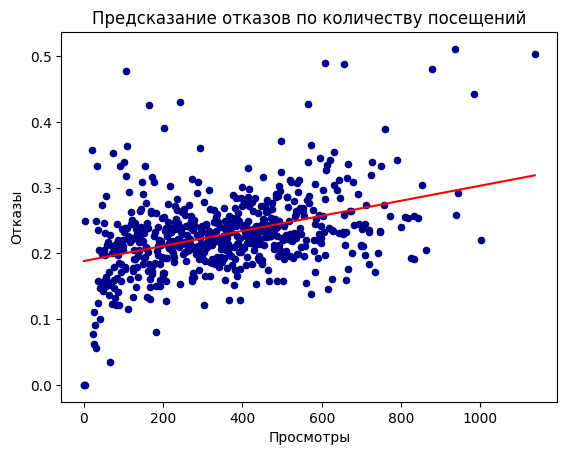

In [40]:
ax= df_mean.plot.scatter(x="Просмотры", y="Отказы", title = "Предсказание отказов по количеству посещений", color = 'darkblue')
xx = np.arange(0,df_mean['Просмотры'].max()+1)
ax.plot(xx,a+b*xx, color = 'red' ) #формула линейной регрессии: a+b*xx, т.к.это векторизация, то по элементам выполнится для каждого х(по оси X-откладываем X, по оси Y откладываем bx)-формула линейного графика, линии.

### Вывод: количество отказов при увеличении количества посетителей по предсказанию возрастает (от 20% до 30% при 1000 посетителей). Если вебсайт хороший, то красная кривая будет иметь горизонтальное расположение или опускаться вниз, от посещаемости отказы не должны зависеть обычно, если только есть какие-то неконтролируемые причины.